### MATH2504 S2, 2024, BigHW Submission 
### Submission form II of IV 

Student #1 name: Yingjie Gu

Student #1 ID: 47982558

Student #2 name: Zhihan Niu

Student #2 ID: 48154857

GitHub repo: 

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

In [1]:
import Pkg; Pkg.add("Primes")

   Resolving package versions...
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Manifest.toml`


In [2]:
import Pkg; Pkg.add("BenchmarkTools")

   Resolving package versions...
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Manifest.toml`


# Solution to [Question 5](https://courses.smp.uq.edu.au/MATH2504/2024/assessment_html/bighw.html#q5)

## 5a:

A number is abundant if the sum of its proper divisors is greater than the number itself.  

A number is deficient if the sum of its proper divisors is less than the number itself.  

Primitive abundant number (PAN): An abundant number n such that none of its proper divisors are abundant. All proper divisors must be deficient. 

`Why 20 is a PAN`

Proper divisors of 20: 1, 2, 4, 5, 10.  Their sum is 1+2+4+5+10 = 22 which is greater than 20, so 20 is abundant.

Check each proper divisor is deficient:

1 → sum of proper divisors = 0 (<1) → deficient

2 → 1 (<2) → deficient

4 → 1+2 = 3 (<4) → deficient

5 → 1 (<5) → deficient

10 → 1+2+5 = 8 (<10) → deficient

Since 20 is abundant and all its proper divisors are deficient, 20 is a primitive abundant number.

`Why 18, 19, 21, 22, 23 are not PANs`

18: proper divisors 1, 2, 3, 6, 9 sum to 21 (>18), so 18 is abundant.But 18 has a proper divisor 6, and 6 is perfect (its proper divisors 1,2,3 add to 6). PANs are not allowed to have non-deficient proper divisors, so 18 is not primitive.

19: prime → proper divisors sum to 1 (<19) → deficient, not abundant → not PAN.

21: proper divisors 1, 3, 7 sum to 11 (<21) → deficient → not PAN.

22: proper divisors 1, 2, 11 sum to 14 (<22) → deficient → not PAN.

23: prime → proper divisors sum to 1 (<23) → deficient → not PAN.



## 5b:

In [3]:
using Primes

# Sum of proper divisors without allocating a slice
proper_sum(n) = sum(divisors(n)) - n

is_abundant(n) = proper_sum(n) > n

function is_primitive_abundant(n)
    if !is_abundant(n)
        return false
    end
    # get proper divisors once (exclude n by filtering)
    for d in divisors(n)
        if d == n; continue; end
        if is_abundant(d)
            return false  # short-circuit
        end
    end
    return true
end

for n in 1:1000
    if is_primitive_abundant(n)
        println(n)
    end
end


12
18
20
30
42
56
66
70
78
88
102
104
114
138
174
186
196
222
246
258
272
282
304
308
318
354
364
366
368
402
426
438
464
474
476
498
532
534
550
572
582
606
618
642
644
650
654
678
748
762
786
812
822
834
836
868
894
906
942
945
978
992


## 5c:

In [4]:
function proper_divisors(n)
    result = Int[]
    for i in 1:n÷2
        if n % i == 0
            push!(result, i)
        end
    end
    return result
end

function is_abundant(n)
    return sum(proper_divisors(n)) > n
end

function is_primitive_abundant(n)
    if !is_abundant(n)
        return false
    end
    for d in proper_divisors(n)
        if is_abundant(d)
            return false
        end
    end
    return true
end

for n in 1:1000
    if is_primitive_abundant(n)
        println(n)
    end
end


12
18
20
30
42
56
66
70
78
88
102
104
114
138
174
186
196
222
246
258
272
282
304
308
318
354
364
366
368
402
426
438
464
474
476
498
532
534
550
572
582
606
618
642
644
650
654
678
748
762
786
812
822
834
836
868
894
906
942
945
978
992


---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 6](https://courses.smp.uq.edu.au/MATH2504/2024/assessment_html/bighw.html#q6)

In [5]:
"""
Returns the all the primes up to n.
"""
function sieve_of_Eratosthenes(n)
    primebits = ones(Bool,n) #Will contain true if the index is prime (initially all assumed prime)
    primebits[1] = false #The number 1 is not prime
    p = 2 #Smallest prime
    while p ≤ n
        i = 2p
        while i ≤ n  # \le +[TAB]
            primebits[i] = false
            i += p
        end
        p += 1
        while p ≤ n && !primebits[p]
            p += 1
        end
    end
    (1:n)[primebits]
end

n = 100
println("First $n primes: ",sieve_of_Eratosthenes(n))

First 100 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


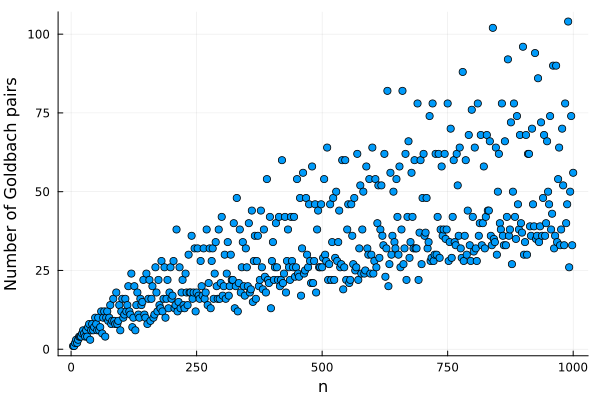

In [6]:
using Plots
function check_Goldbach(n)
    @assert iseven(n)
    num_pairs = 0
    for p in sieve_of_Eratosthenes(n)
        if in(n-p,sieve_of_Eratosthenes(n))
            num_pairs += 1
        end
    end
    return num_pairs
end

n = 10^3
even_range = 4:2:n
checks = check_Goldbach.(even_range)
if 0 ∈ checks
    println("Found a counter example for Goldbach")
end
scatter(rand(10))
scatter(even_range,checks,legend=false,xlabel="n",ylabel="Number of Goldbach pairs")

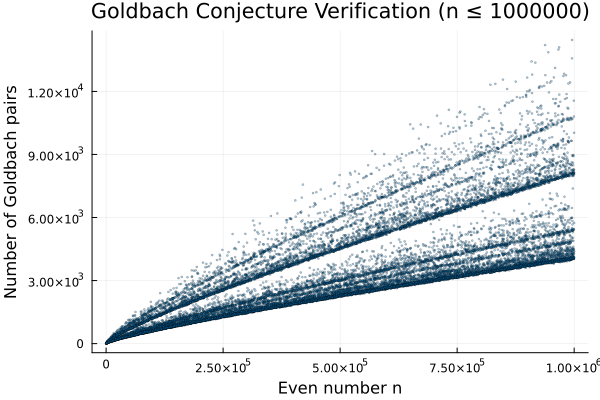

In [23]:
using Plots
using Random

function sieve_of_eratosthenes(n)
    is_prime = trues(n)
    is_prime[1] = false
    p = 2
    while p * p <= n
        if is_prime[p]
            for i in p*p:p:n
                is_prime[i] = false
            end
        end
        p += 1
    end
    primes = findall(is_prime)
    return primes
end

function main()
    N = 10^6
    primes = sieve_of_eratosthenes(N)
    goldbach_counts = zeros(Int, N+1)
    
    m = length(primes)
    for i in 1:m
        p = primes[i]
        for j in i:m
            q = primes[j]
            n = p + q
            n > N && break
            goldbach_counts[n] += 1
        end
    end
    
    
    for n in 4:2:N
        if goldbach_counts[n] == 0
            println("Counterexample found: $n")
        end
    end
    
    
    even_numbers = 4:2:N
    total_points = length(even_numbers)
    sample_size = min(20000, total_points)
    
    
    sample_indices = randperm(total_points)[1:sample_size]
    x = even_numbers[sample_indices]
    y = [goldbach_counts[i] for i in x]
    
   
    scatter(x, y, 
            legend=false, 
            markersize=1,
            markeralpha=0.3,
            xlabel="Even number n", 
            ylabel="Number of Goldbach pairs",
            title="Goldbach Conjecture Verification (n ≤ $N)")
end

main()

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 7](https://courses.smp.uq.edu.au/MATH2504/2024/assessment_html/bighw.html#q7)

## 7a:

Certainly! Programming can be seen as a vast umbrella term encompassing various activities related to instructing computers on how to carry out tasks, while "coding" is often used more narrowly or informally within that context. Here's an expanded explanation:  

Programming refers to the entire process of writing and testing code which specifies what a computer program or other technology should do. Programmers design algorithms (sets of step-by-step instructions) for solving problems, as well as systems architecture designs where   
programming isn’t necessarily required. The act is both creative – in coming up with solutions to complex issues; and methodical - following strict logical steps to ensure the desired outcome.

Programming requires a deep understanding of computer science principles like data structures, algorithms, computation complexity     
(Big O notation), object-oriented programming languages like Java or Python, as well as system design for building applications that are   
scalable, secure and efficient. It also includes planning software architecture before writing code. Good programmers must consider how to 
optimize resources such as memory usage, CPU time during runtime execution of their programs. Programming is about finding the most elegant solutions within these constraints.

Furthermore, programming can involve several stages from problem analysis through system and UI design (if necessary), coding in a   
particular language or languages chosen for development, debugging to find errors, documenting code with comments explaining logic and   
functionality, testing using unit tests/integration tests etc., maintaining the software over time. Programmers must also be skilled at   
project management when working on large-scale projects involving multiple programmers (development teams).

In summary, programming is a comprehensive process that requires not only writing code but understanding and planning how to make efficient systems within complex constraints, often using formal methods like algorithms design or system architecture. It’s an expansive field with  subfields such as web development, mobile app development, game development (Unity3D), artificial intelligence etc., each requiring different skills in programming languages along with the principles mentioned above but tailored to specific types of software applications and hardware platforms they operate on.

Coding is often used informally or when someone wants to refer specifically to writing code, typically without delving into high level   
design aspects. This term usually refers just to composing lines of instructions in a programming language that will be executed by the   
computer processor (and possibly interpreted by an interpreter). For example, coding could mean simply typing out Python script for data   
analysis or Java classes and methods if one doesn’t need to consider broader software structure design/architecture. Coding is about   
writing syntactically correct code within a programming language that achieves desired functionality of the system without considering   
higher-level problems like how well it scales, its security vulnerabilities etc., which would typically fall under programmers'   
responsibilities when they progress to development phase in software engineering life cycle

In simple terms coding is just writing and testing lines/blocks or even whole functions that will instruct a computer on what tasks to   
perform without considering broader system design aspects. While it’s necessary for successful programming, someone can technically code   
independently (without necessarily being considered an accomplished programmer), while professional programmers understand all the phases   
of software engineering life cycle as described above in addition to coding proficiency and understanding how their written codes interact with hardware/software components at micro-level(hardware interrupt handlers etc.).

So, programming is a comprehensive discipline involving various aspects like problem analysis, system design (if necessary), writing code  
using appropriate languages along with testing it for robustness & reliability. Coding on the other hand refers specifically to composing   
lines of instructions in an agreed upon language that instructs hardware/software components to carry out tasks within defined constraints but without necessarily delving into higher level planning and analysis aspects required during programming phases mentioned above, as   
well system architecture design considerations (if necessary).



## 7b:

{"model":"phi3","created_at":"2025-08-07T05:34:38.638287Z","message":{"role":"assistant","content":"Programming is a broad concept that encompinasses various activities related to creating software, including writing code in specific languages like C++ or Java. It involves designing algorithms, debugging programs, understanding complex systems, and ensuring overall efficiency of the application being developed. Programming requires not only technical skills but also problem-solving abilities as it often includes dealing with issues that may arise during development such as fixing bugs or optimizing code for performance.\n\nCoding on the other hand is a specific aspect within programming where you write actual lines of code in various languages to achieve your desired outcome, usually following predefined algorithms and solutions provided by developers before them. Coders often specialize in one language like Python, Ruby, Java or HTML/CSS for web development. A coder might spend most if not all their time writing functions that handle specific tasks within an application without necessarily understanding the broader system design aspect of programming as a whole.\n\nTo put it simply: All coders are programmers but not all programmers code because coding is just one subset or task in overall software development which also includes planning, algorithm creation and testing among other things besides actual writing lines of code to create applications that work efficiently."},"done_reason":"stop","done":true,"total_duration":57114841562,"load_duration":34289684,"prompt_eval_count":23,"prompt_eval_duration":675593727,"eval_count":251,"eval_duration":56398918427}%  

`-d` stands for data, which is used to send the POST request body to the server.  
`127.0.0.1` is a special IP address called localhost, meaning "this machine."  
`11434` is the default listening port for Ollama, the port used to receive external requests when the server is running.  

## 7c:

In [24]:
import Pkg
Pkg.add("HTTP")

   Resolving package versions...
    Updating `C:\Users\32466\.julia\environments\v1.11\Project.toml`
  [cd3eb016] + HTTP v1.10.17
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Manifest.toml`


In [25]:
import Pkg
Pkg.add("JSON")

   Resolving package versions...
    Updating `C:\Users\32466\.julia\environments\v1.11\Project.toml`
  [682c06a0] + JSON v0.21.4
  No Changes to `C:\Users\32466\.julia\environments\v1.11\Manifest.toml`


In [26]:
using HTTP
using JSON

url = "http://127.0.0.1:11434/api/chat"

data = Dict(
    "model" => "phi3",
    "messages" => [
        Dict("role" => "user", "content" => "I am wondering about the difference between programming and coding. Please explain.")
    ],
    "stream" => false
)

response = HTTP.post(url, ["Content-Type" => "application/json"], JSON.json(data))
result = JSON.parse(String(response.body))

println(result["message"]["content"])

Programming is a broader term that refers to creating algorithms, designing systems, analyzing problems, thinking logically, making decisions based on data, debugging code, optimizing performance, testing for errors, documenting code, maintaining existing programs or fixing bugs in legacy codes and writing user interfaces. It's the art of solving complex issues with computer languages like Python, Java, C++, Ruby etc., which requires a deep understanding of both technology as well as non-technical aspects such as design thinking, debugging skills, optimization strategies among others.

Coding on the other hand is just one part or activity within programming where you translate these algorithms into executable computer instructions using specific coding languages like HTML for web development, Python to create data analysis scripts and Ruby when building a simple command-line application etc. Coding essentially refers to writing code that tells computers what tasks they need to perform 

## 7d:

In [27]:
using HTTP
using JSON

function ask_llm(prompt::String)
    url = "http://127.0.0.1:11434/api/chat"
    data = Dict(
        "model" => "phi3",
        "messages" => [Dict("role" => "user", "content" => prompt)],
        "stream" => false
    )
    response = HTTP.post(url, ["Content-Type" => "application/json"], JSON.json(data))
    result = JSON.parse(String(response.body))
    return result["message"]["content"]
end

println("Chat with Phi3 (type 'exit' to quit):")
while true
    print("You: ")
    user_input = readline()
    if lowercase(user_input) == "exit"
        println("Goodbye!")
        break
    end
    response = ask_llm(user_input)
    println("Phi3: ", response)
end

Chat with Phi3 (type 'exit' to quit):
You: 

stdin>  Which universities are there in Brisbane?


Phi3: Brisbane, Queensland's vibrant city and the country's third-largest urban area by population size after Sydney and Melbourne, hosts numerous prestigious institutions of higher learning. The main university is University of Queensland (UQ), established in 1855 as Australia’s first state university. It comprises campuses across Brisbane – St Lucias campus focused on science and medicine; New Farm Campus for arts and humanities, the Centenary Riverside complex specializing in environmental sciences, engineering, economics & business studies among others; Gardens Point focusing education to nursing students.

The University of Southern Queensland (USQ), located at Toowoomba is also accessible from Brisbane and offers a diverse range of courses including healthcare, science technology, social welfare, arts, agriculture which can be commuted via regular bus services or trains to the city center in less than 2 hours.

The Queensland University of Technology (QUT) with campuses located a

stdin>  what is the capital of China


Phi3: The capital of China is Beijing. It'thus making it one of the most populous cities in the world and an important global cultural, political, and economic center. The city houses significant historical sites such as Tiananmen Square, the Forbidden City (the palace that served as the home for 32 Chinese emperors), and serves as a major hub with modern infrastructure like the Bird's Nest Stadium used in the Olympics games of 2008. Beijing is also recognized for its academic institutions such as Peking University, which was established during the late Qing Dynasty (1903).
You: 

stdin>  exit


Goodbye!


![终端截图](Terminal%20interface.jpg)

![聊天截图](chat.jpg)

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 8](https://courses.smp.uq.edu.au/MATH2504/2024/assessment_html/bighw.html#q8)

## 8a:

In [10]:
function array_table(array, heading)
    println(heading,":")
    for (i,a) in enumerate(array)
        println(i,"\t",a)
    end
end

names = [   "Amy Chan",
            "Maithili Mehta",
            "Anna Foeglein",
            "Andy Ferris",
            "Claire Foster",
            "Jack Litfin",
            "Thomas Graham",
            "Elaine Schenk",
            "Jesse Woods",
            "Tina Moghaddam",
            "Zhihao Qiao",
            "Paul Bellette",
            "Paul Vrbik",
            "Tom Cranitch",
            "Yoni Nazarathy",
            "Sam Hambleton",
            "Isaac Beh", 
            "Limao Chang", 
            "Nazeef Hamid", 
            "Cooper Janke", 
            "Brandon Lowe", 
            "Lief Lundmark",
            "Megan Dawson",
            "Alistair Falconer",
            "Emma Comino",
            "Ivana Carrizo-Molina",
            "Amitai Rosenbaum",
            "Jay Parfitt",
            "Mittun Sudhahar",
            "Dietmar Oelz"]

sorted_names = sort(names)
array_table(sorted_names, "Sorted by first name")

println()

sorted_names = sort(names,by=(x)->reverse(split(x," ")))
array_table(sorted_names,"Sorted by last name")

println()

sorted_names = sort(names, by=x -> length(split(x, " ")[end]))
array_table(sorted_names, "Sorted by shortest last name")

Sorted by first name:
1	Alistair Falconer
2	Amitai Rosenbaum
3	Amy Chan
4	Andy Ferris
5	Anna Foeglein
6	Brandon Lowe
7	Claire Foster
8	Cooper Janke
9	Dietmar Oelz
10	Elaine Schenk
11	Emma Comino
12	Isaac Beh
13	Ivana Carrizo-Molina
14	Jack Litfin
15	Jay Parfitt
16	Jesse Woods
17	Lief Lundmark
18	Limao Chang
19	Maithili Mehta
20	Megan Dawson
21	Mittun Sudhahar
22	Nazeef Hamid
23	Paul Bellette
24	Paul Vrbik
25	Sam Hambleton
26	Thomas Graham
27	Tina Moghaddam
28	Tom Cranitch
29	Yoni Nazarathy
30	Zhihao Qiao

Sorted by last name:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Claire Foster
13	Thomas Graham
14	Sam Hambleton
15	Nazeef Hamid
16	Cooper Janke
17	Jack Litfin
18	Brandon Lowe
19	Lief Lundmark
20	Maithili Mehta
21	Tina Moghaddam
22	Yoni Nazarathy
23	Dietmar Oelz
24	Jay Parfitt
25	Zhihao Qiao
26	Amitai Rosenbaum
27	Elaine Schenk
28	Mittun Sudhahar
29	Paul V

## 8b:

In [11]:
function my_sort_bubble(arr::Vector{T}; by = identity) where T
    n = length(arr)
    result = copy(arr)
    for i in 1:n-1
        for j in 1:n-i
            if by(result[j]) > by(result[j+1])
                result[j], result[j+1] = result[j+1], result[j]
            end
        end
    end
    return result
end

sorted_bubble_lastname = my_sort_bubble(names, by = name -> reverse(split(name)))
array_table(sorted_bubble_lastname, "Bubble Sort by Last Name")

Bubble Sort by Last Name:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Claire Foster
13	Thomas Graham
14	Sam Hambleton
15	Nazeef Hamid
16	Cooper Janke
17	Jack Litfin
18	Brandon Lowe
19	Lief Lundmark
20	Maithili Mehta
21	Tina Moghaddam
22	Yoni Nazarathy
23	Dietmar Oelz
24	Jay Parfitt
25	Zhihao Qiao
26	Amitai Rosenbaum
27	Elaine Schenk
28	Mittun Sudhahar
29	Paul Vrbik
30	Jesse Woods


## 8c:

In [12]:
function my_sort_quick(arr::Vector{T}; by = identity) where T
    if length(arr) ≤ 1
        return arr
    else
        pivot = arr[end]
        less = [x for x in arr[1:end-1] if by(x) ≤ by(pivot)]
        greater = [x for x in arr[1:end-1] if by(x) > by(pivot)]
        return vcat(my_sort_quick(less; by=by), [pivot], my_sort_quick(greater; by=by))
    end
end

sorted_quick_lastname = my_sort_quick(names, by = name -> reverse(split(name)))
array_table(sorted_quick_lastname, "Quick Sort by Last Name")


Quick Sort by Last Name:
1	Isaac Beh
2	Paul Bellette
3	Ivana Carrizo-Molina
4	Amy Chan
5	Limao Chang
6	Emma Comino
7	Tom Cranitch
8	Megan Dawson
9	Alistair Falconer
10	Andy Ferris
11	Anna Foeglein
12	Claire Foster
13	Thomas Graham
14	Sam Hambleton
15	Nazeef Hamid
16	Cooper Janke
17	Jack Litfin
18	Brandon Lowe
19	Lief Lundmark
20	Maithili Mehta
21	Tina Moghaddam
22	Yoni Nazarathy
23	Dietmar Oelz
24	Jay Parfitt
25	Zhihao Qiao
26	Amitai Rosenbaum
27	Elaine Schenk
28	Mittun Sudhahar
29	Paul Vrbik
30	Jesse Woods


## 8d:

In [13]:
using Random, BenchmarkTools
data1 = rand(Int, 10^4)
data2 = rand(Int, 10^7)
data3 = rand(Int, 10^8)  

println("Sorting 10^4 integers")
@btime sort($data1)
@btime my_sort_bubble($data1)
@btime my_sort_quick($data1)

println("\nSorting 10^7 integers")
@btime sort($data2)
@btime my_sort_quick($data2)

println("\nSorting 10^8 integers")
@btime sort($data3)
@btime my_sort_quick($data3)


Sorting 10^4 integers
  114.500 μs (9 allocations: 164.52 KiB)
  41.841 ms (3 allocations: 78.19 KiB)
  2.786 ms (89587 allocations: 9.44 MiB)

Sorting 10^7 integers
  260.158 ms (9 allocations: 152.60 MiB)
  8.443 s (89680146 allocations: 15.64 GiB)

Sorting 10^8 integers
  2.303 s (9 allocations: 1.49 GiB)
  96.650 s (896888818 allocations: 173.59 GiB)


100000000-element Vector{Int64}:
 -9223371766895919270
 -9223371743330405398
 -9223371219526189535
 -9223371029651696619
 -9223370844062027491
 -9223370629628797465
 -9223370592295129380
 -9223370441434859109
 -9223370363311075146
 -9223370262469931578
 -9223369361476502520
 -9223369281503414031
 -9223368923957857490
                    ⋮
  9223368240509120037
  9223368981082432079
  9223369002920853097
  9223369336867848311
  9223370281103484281
  9223370431484502888
  9223370456365070201
  9223370643327559826
  9223370970889011193
  9223371353200218598
  9223371790365054294
  9223371967162558309

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---

# Solution to [Question 9](https://courses.smp.uq.edu.au/MATH2504/2024/assessment_html/bighw.html#q9)

In [14]:
using LinearAlgebra
using Random
Random.seed!(1)
A = round.(10*rand(2,3))
B = round.(10*rand(3,4))
A*B

2×4 Matrix{Float64}:
 127.0  87.0  3.0  95.0
  71.0  61.0  9.0  80.0

In [15]:
function my_mult_inner_products(A,B)
    nA,mA = size(A)
    nB,mB = size(B)
    @assert mA == nB
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef,n,p)

    for i in 1:n
        for j in 1:p
            C[i,j] = A[i,:]' * B[:,j] #compute inner product of i'th row of A and j'th column of B
        end
    end
    return C
end

my_mult_inner_products(A,B)

2×4 Matrix{Float64}:
 127.0  87.0  3.0  95.0
  71.0  61.0  9.0  80.0

## 9a:

In [16]:
function my_mult_by_cols(A, B)
    nA, mA = size(A)
    nB, mB = size(B)
    @assert mA == nB  # check dimensions match
    n, m, p = nA, mA, mB
    C = Array{Float64}(undef, n, p)

    # Loop over columns of B
    for j in 1:p
        colC = zeros(Float64, n)  # temporary column for result
        for k in 1:m
            colC += B[k,j] * A[:,k]
        end
        C[:,j] = colC
    end
    return C
end

my_mult_by_cols (generic function with 1 method)

In [17]:
# test
using LinearAlgebra
using Random
Random.seed!(1)
A = round.(10*rand(2,3))
B = round.(10*rand(3,4))

println(my_mult_by_cols(A,B))
println(A*B)  

[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]
[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]


## 9b:

In [18]:
function my_mult_by_rows(A, B)
    nA, mA = size(A)
    nB, mB = size(B)
    @assert mA == nB 
    C = zeros(eltype(A), nA, mB)
    
    for i in 1:nA
        for k in 1:mA
            C[i, :] += A[i, k] * B[k, :]
        end
    end
    return C
end

my_mult_by_rows (generic function with 1 method)

In [19]:
# test
using LinearAlgebra
using Random
Random.seed!(1)
A = round.(10*rand(2,3))
B = round.(10*rand(3,4))

C_rows = my_mult_by_rows(A,B)
println(C_rows)
println(A*B)             

[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]
[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]


## 9c:

In [20]:
function my_mult_sum_outer_products(A, B)
    nA, mA = size(A)
    nB, mB = size(B)
    @assert mA == nB 
    C = zeros(eltype(A), nA, mB)
    
    for k in 1:mA
        C += A[:, k:k] * B[k:k, :]  
    end
    return C
end

my_mult_sum_outer_products (generic function with 1 method)

In [21]:
# test
using LinearAlgebra
using Random
Random.seed!(1)
A = round.(10*rand(2,3))
B = round.(10*rand(3,4))

C_outer = my_mult_sum_outer_products(A,B)
println(C_outer)
println(A*B)                 

[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]
[127.0 87.0 3.0 95.0; 71.0 61.0 9.0 80.0]


## 9d:


In [22]:
using BenchmarkTools
@btime my_mult_inner_products(A,B)
@btime my_mult_by_cols(A,B)
@btime my_mult_by_rows(A,B)
@btime my_mult_sum_outer_products(A,B)

  370.952 ns (34 allocations: 1.39 KiB)
  867.273 ns (82 allocations: 3.27 KiB)
  596.721 ns (50 allocations: 2.39 KiB)
  668.553 ns (26 allocations: 1.59 KiB)


2×4 Matrix{Float64}:
 127.0  87.0  3.0  95.0
  71.0  61.0  9.0  80.0

We can use the BenchmarkTools to see the efficiency  
`9a`, `9b`, and `9c` are not more efficient than the inner product method ( my_mult_inner_products ). Although they appear to have only a 
single loop while the inner product method has two, all methods have exactly the same computational complexity. This is because all methods 
require n×m×p multiplications and the same number of additions. Each iteration of the single-loop implementation ( `9a`, `9b`, `9c` ) implicitly 
performs the entire inner loop. Therefore, their computational complexity is equivalent.

---

*Use this area below as an experimental playground for the question. Feel free to leave some of the experimental code here with your submision. However, it will not be marked or reviewed. Make sure in your submission that if there is any experimental code here then running it does not interfere with running the actual solutions.*

---